

*   **!! Copy file colab ini ke drive masing-masing !!**
*   Jawab soal secara berurutan, pastikan cell kode dan output untuk setiap soal tepat berada dibawah bagian soal tersebut
*   Kerjakan dengan maksimal
*   Silakan menambahkan library lain kalau memang diperlukan







# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import yellowbrick
from yellowbrick.style import set_palette
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline


# Import Dataset


*   gunakan link ini untuk mengimport dataset : https://raw.githubusercontent.com/bayuazra23/datasets/main/Data%20Pergerakan%20Harga.csv
*   Simpan dataset dalam variabel bernama "df"
*   Variabel terikat untuk dataset ini adalah Pergerakan Harga, dengan kolom lain sebagai variable bebas




In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/bayuazra23/datasets/main/Data%20Pergerakan%20Harga.csv')

In [ ]:
df

,No,Tanggal,Lokasi,Aktual Harga,Aktual Produksi,Aktual Luas Tanam,Aktual Curah Hujan,Aktual Bencana,Aktual Luas Terkena Hama,Stabilitas Harga,Musim,Banjir,Prosentase Hama,Hama,Pergerakan Harga,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1,2008-01-01,1,5006,288577,194599,240.9,1.0,0.0,Stabil,Penghujan,Banjir,0.000000,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
1,11,2008-01-01,11,5112,7722,12653,463.0,0.0,0.0,Stabil,Kemarau,Banjir,0.000000,Tidak Ada Hama,Naik,NaN,NaN,NaN,NaN
2,12,2008-02-01,1,5032,709949,76497,116.5,1.0,0.0,Stabil,Penghujan,Banjir,0.000000,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
3,23,2008-03-01,1,4878,1622137,121151,242.4,1.0,0.0,Stabil,Penghujan,Banjir,0.000000,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
4,34,2008-04-01,1,4745,1957305,260823,297.1,1.0,0.0,Stabil,Penghujan,Tidak Ada Banjir,0.000000,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1123,2016-07-01,1,8820,646413,83590,182.3,1.0,6090.0,STABIL,Kemarau,Ada Bencana,2.863646,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
104,1134,2016-08-01,1,8747,150588,68699,128.7,1.0,7020.0,STABIL,Penghujan,Ada Bencana,3.170074,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
105,1145,2016-09-01,1,8725,335396,34712,286.2,1.0,4833.0,STABIL,Penghujan,Ada Bencana,5.953522,Tidak Ada Hama,Turun,NaN,NaN,NaN,NaN
106,1156,2016-10-01,1,8769,2149952,79631,362.3,1.0,5590.0,STABIL,Penghujan,Ada Bencana,7.261036,Tidak Ada Hama,Naik,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['No', 'Tanggal', 'Lokasi', 'Aktual Harga', 'Aktual Produksi',
       'Aktual Luas Tanam', 'Aktual Curah Hujan', 'Aktual Bencana',
       'Aktual Luas Terkena Hama', 'Stabilitas Harga', 'Musim', 'Banjir',
       'Prosentase Hama', 'Hama', 'Pergerakan Harga', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [ ]:
df.isnull().sum()

## Lakukan Label encoding untuk kolom kategorikal



```
# contoh proses label encoding
for col in df[['sex','island']]:
  df[col] = LabelEncoder().fit_transform(df[col])
```



In [ ]:
for col in df[['Hama','Stabilitas Harga','Musim','Banjir','Pergerakan Harga']]:
  df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df

In [ ]:
df_not_encoded=pd.read_csv('https://raw.githubusercontent.com/bayuazra23/datasets/main/Data%20Pergerakan%20Harga.csv')

# EDA

**Pertanyaan** : Buatlah 3 buah business case beserta kebutuhan analisis untuk melakukan eksplorasi pada dataset yang ada, jawab business case tersebut dengan berbagai metode statistik.  





In [ ]:
# "Ini adalah contoh sebuah business case.  Business case ini diperlukan untuk melihat hubungan pergerakan nilai Y terhadap kondisi X"
[kode]

In [ ]:
#Melihat jumlah banjir/bencana yang ada di setiap musimnya
df_not_encoded.groupby('Musim').Banjir.value_counts()

Musim      Banjir           
Kemarau    Ada Bencana          17
           Tidak Ada Bencana    15
           Tidak Ada Banjir      6
           Banjir                4
Penghujan  Ada Bencana          48
           Banjir                9
           Tidak Ada Banjir      5
           Tidak Ada Bencana     4
Name: Banjir, dtype: int64

In [ ]:
#melihat aktual harga tertinggi yang ada pada setiap musimnya
df_not_encoded.groupby('Musim')['Aktual Harga'].max()

Musim
Kemarau      8865
Penghujan    9142
Name: Aktual Harga, dtype: int64

In [ ]:
#menunjukan data statistik presentasi hama ketika data menunjukan ada hama atau tidak
df_not_encoded.groupby('Hama')['Prosentase Hama'].describe()

,count,mean,std,min,25%,50%,75%,max
Hama,,,,,,,,
Ada Hama,21.0,16.469404,5.865215,10.179547,11.516061,16.117707,18.015688,29.723454
Tidak Ada Hama,87.0,3.427471,2.862662,0.000000,0.000000,3.232161,5.832325,9.694470


# Visualisasi Data

**Pertanyaan** : anda akan diminta untuk membuat sebuah visualisasi untuk setiap jenis grafik yang sudah dipelajari.  Mengenai data yang digunakan untuk setiap grafik, lakukan analisis terhadap dataset, lalu tentukan kolom yang cocok untuk masing-masing jenis grafik. Sertakan reasoning terhadap grafik yang dibuat menggunakan komen, perhatikan contoh cell dibawah

## contoh

In [ ]:
#Grafik barplot untuk membandingkan jumlah pinguin dari setiap pulau
[kode]

## Barplot



```
# contoh
housing_ames.data.GarageType.value_counts().plot(kind='bar')
plt.show()
```



In [ ]:
df_not_encoded['Pergerakan Harga'].value_counts()

Naik     70
Turun    38
Name: Pergerakan Harga, dtype: int64

<Axes: ylabel='frekuensi'>

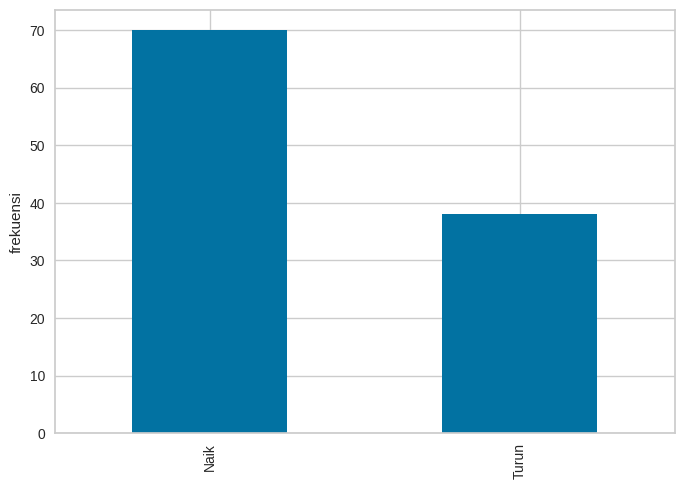

In [ ]:
# [Visualisasi untuk melihat pergerakan harga yang dimiliki]
df_not_encoded['Pergerakan Harga'].value_counts().plot(kind="bar",ylabel='frekuensi')

## Line Graph



```
# contoh
amtrak.plot(x='date', y='passengers', figsize=(15,8))
```



<Axes: xlabel='Tanggal', ylabel='aktual harga'>

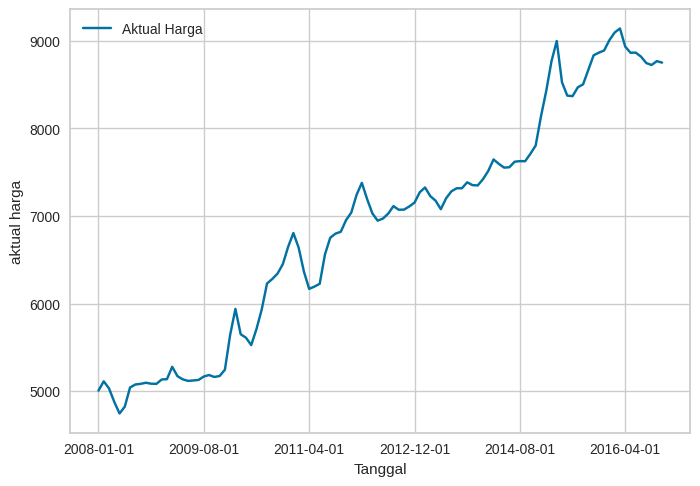

In [ ]:
# [Data aktual harga yang masuk per tanggalnya]
df_not_encoded.plot(x='Tanggal', y='Aktual Harga',ylabel='aktual harga')

## Boxplot



```
# Contoh
housing_df.boxplot(column='AveOccup')
```



<Axes: xlabel='Musim', ylabel='Aktual Harga'>

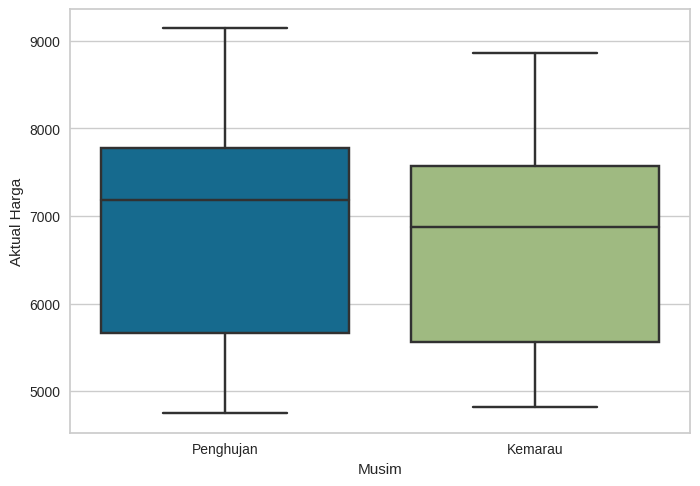

In [ ]:
# [Melihat distribusi aktual harga yang ada di setiap musimnya]
sns.boxplot(data=df_not_encoded, x='Musim', y='Aktual Harga')

## Histogram



```
# contoh
fig, axis = plt.subplots(figsize=(20, 8))
housing_df.hist(ax=axis)
plt.show()
```



<Axes: >

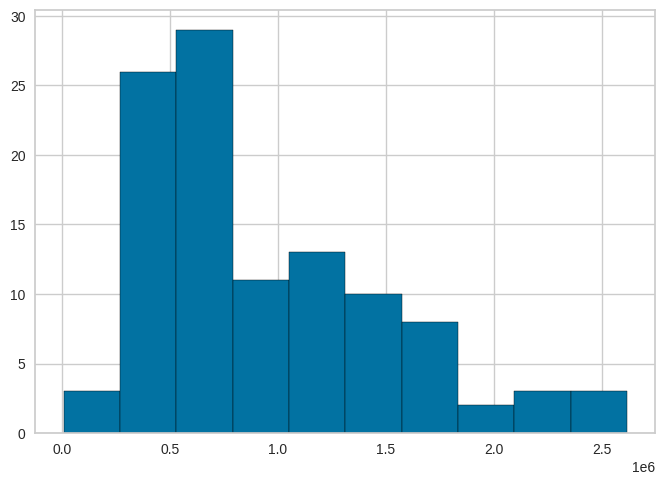

In [ ]:
# [Melihat ditribusi jumlah data aktual produksi]
df_not_encoded['Aktual Produksi'].hist(edgecolor='black')

# Data Mining

**Pertanyaan** :


*   Buatlah model menggunakan masing-masing algoritma
*   Lakukan spliting data dengan rasio train:test sebesar 80:20
*   Tampilkan juga classification report untuk masing-masing model




```
# contoh
classifier=GaussianNB()
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier=DecisionTreeClassifier()
classifier = LogisticRegression()
```



## Data Preparation



```
# Contoh
X = data_nb.iloc[:, [1,2,3,4]].values
y = data_nb.iloc[:, 5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
```



In [ ]:
data_nb = df.dropna()

In [ ]:
data_nb.isnull().sum()

In [ ]:
X = df.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13]].values
y = df.iloc[:, 14].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
df.columns

Index(['No', 'Tanggal', 'Lokasi', 'Aktual Harga', 'Aktual Produksi',
       'Aktual Luas Tanam', 'Aktual Curah Hujan', 'Aktual Bencana',
       'Aktual Luas Terkena Hama', 'Stabilitas Harga', 'Musim', 'Banjir',
       'Prosentase Hama', 'Hama', 'Pergerakan Harga', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

## Naive Bayes

In [ ]:
Classifier = GaussianNB()
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)

acc=accuracy_score(y_test, y_pred)
print(acc)

0.7272727272727273


In [ ]:
cross_val_score(Classifier, X_test, y_test, cv=10).mean()

0.6333333333333333

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.80      0.44      0.57         9

    accuracy                           0.73        22
   macro avg       0.75      0.68      0.69        22
weighted avg       0.74      0.73      0.71        22



## KNN

*   coba nilai K sebesar 3, 5, 7, 9. Buatlah model dengan nilai K terbaik






In [ ]:
for k in [3,5,7,9] :
  Classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  Classifier.fit(X_train, y_train)
  y_pred = Classifier.predict(X_test)

  acc=accuracy_score(y_test, y_pred)
  print("k=",k,"  acc =",acc)


k= 3   acc = 0.7272727272727273
k= 5   acc = 0.7727272727272727
k= 7   acc = 0.6818181818181818
k= 9   acc = 0.6818181818181818


In [ ]:
for k in [3,5,7,9] :
  Classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  Classifier.fit(X_train, y_train)
  y_pred = Classifier.predict(X_test)

  acc=cross_val_score(Classifier, X_test, y_test, cv=10).mean()
  print("k=",k,"  acc =",acc)

k= 3   acc = 0.6833333333333333
k= 5   acc = 0.6333333333333333
k= 7   acc = 0.5333333333333333
k= 9   acc = 0.5833333333333333


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.67      0.44      0.53         9

    accuracy                           0.68        22
   macro avg       0.68      0.65      0.65        22
weighted avg       0.68      0.68      0.67        22



## SVM

In [ ]:
Classifier = SVC(kernel = 'rbf', random_state = 0)
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)

acc=accuracy_score(y_test, y_pred)
print(acc)

0.6818181818181818


In [ ]:
cross_val_score(Classifier, X_test, y_test, cv=10).mean()

0.7333333333333333

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.67      0.44      0.53         9

    accuracy                           0.68        22
   macro avg       0.68      0.65      0.65        22
weighted avg       0.68      0.68      0.67        22



## Logistic Regression

In [ ]:
Classifier = LogisticRegression()
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)

acc=accuracy_score(y_test, y_pred)
print(acc)

0.6818181818181818


In [ ]:
cross_val_score(Classifier, X_test, y_test, cv=10).mean()

0.6333333333333333

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.92      0.77        13
           1       0.75      0.33      0.46         9

    accuracy                           0.68        22
   macro avg       0.71      0.63      0.62        22
weighted avg       0.70      0.68      0.65        22



## Decision Tree

In [ ]:
Classifier = DecisionTreeClassifier()
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)

acc=accuracy_score(y_test, y_pred)
print(acc)

0.7272727272727273


In [ ]:
cross_val_score(Classifier, X_test, y_test, cv=10).mean()

0.5166666666666666

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.64      0.78      0.70         9

    accuracy                           0.73        22
   macro avg       0.73      0.74      0.73        22
weighted avg       0.74      0.73      0.73        22



# Clustering

**Pertanyaan** :

*   Lakukan proses clustering menggunakan algoritma KMeans berdasarkan kolom "Aktual Produksi", "Aktual Luas Tanam", dan "Aktual Curah Hujan"
*   Lakukan eksperimen hingga menghasilkan clustering yang menurut kalian ideal
*   Pada baris terakhir, gunakan cell teks untuk memberikan analisis terhadap hasil clustering yang sudah kalian lakukan



In [ ]:
df_c = df[['Aktual Produksi', 'Aktual Luas Tanam', 'Aktual Curah Hujan']]

In [ ]:
df_c

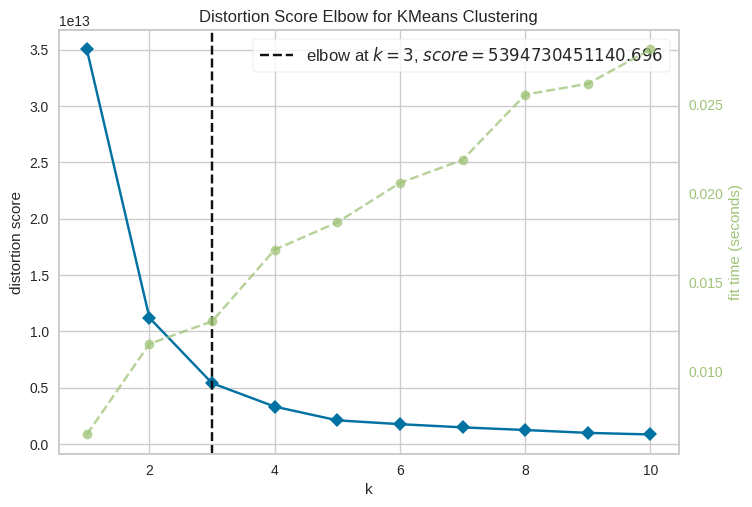

In [ ]:
#Elbow Method
kmeans = KMeans(random_state = 0)
y_kmeans = kmeans.fit_predict(df_c)
model = KElbowVisualizer(kmeans, k = (1, 11))
model.fit(df_c)
model.show();



```
# Contoh cara visualisasi hasil clustering
X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data = X, x= 'Income', y= 'Score', hue=X['Labels'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()
```



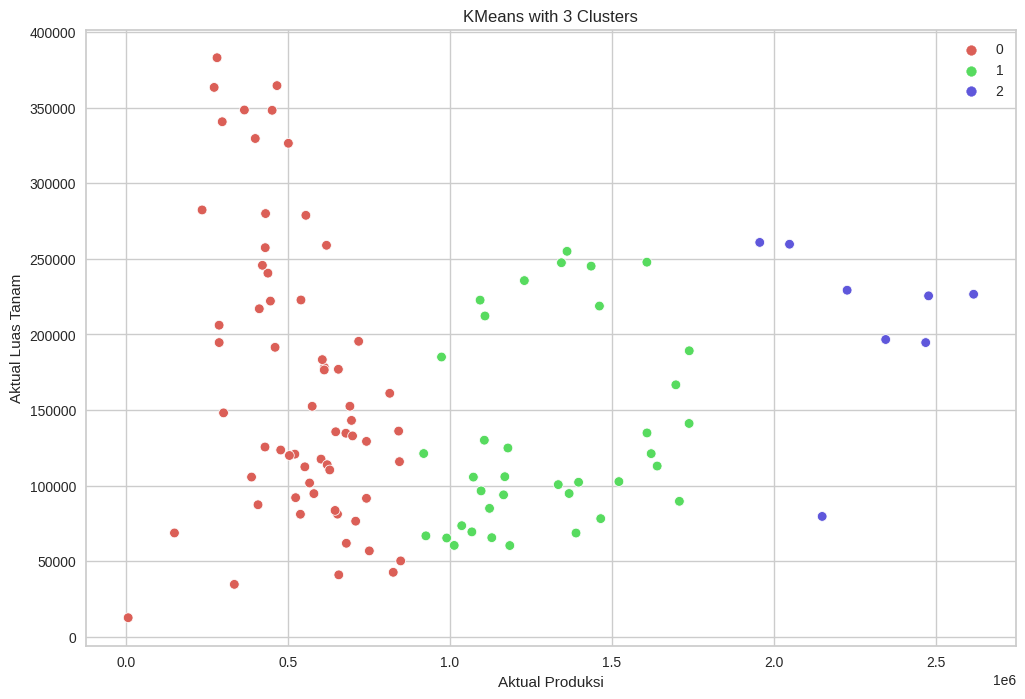

In [ ]:
kmm =KMeans(n_clusters=3)
kmm.fit(df_c)

plt.figure(figsize=(12, 8))
sns.scatterplot(data = df_c, x= 'Aktual Produksi', y= 'Aktual Luas Tanam', hue=kmm.labels_,
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

**Analisis Hasil** : "Ini adalah contoh analisis terhadap hasil clustering yang didapatkan. Saya membaginya ke dalam 3 cluster berdasarkan angka dari aktual produksinya. Dalam cluster 0, mengelompokkan data yang nilai aktual produksinya kurang dari 0. Dapat dilihat di dalam data nilai aktual luas tanamnyamasih sangat menyebar. Di cluster 1 memiliki nilai aktual produksi kurang lebih dari 1-2 dan cluster 3 memiliki nilai aktual produksi di 2 ke atas.
"



--------------



# Selesai 🐈